# Aprendizado Supervisionado no Neurônio Perceptron

In [11]:
# Importando as ferramentas

import numpy as np
import matplotlib.pyplot as plt
import random as rd
from sklearn import metrics
import math

##  Parte I– Resolvendo um Problema Linearmente Separável


1. Usar o arquivo dataAll.txt
2. Construir o algoritmo de treinamento do neurônio perceptron.

In [12]:
arq_input = "dataAll.txt"

dataAll = np.fromfile(arq_input, dtype=np.float64)
print("Tipo de dataAll: {}".format(type(dataAll)))
print("Número de elementos em dataAll: {}".format(dataAll.size))
print("\n")


# -1 infers the size of the new dimension from the size of the input array.
dataAll = np.reshape(dataAll, (1000, 1, 3))
print(dataAll[:10]) # Mostrando 10 exemplos

print("\n")
print("Shape de dataAll: {}".format(dataAll.shape))
print("Dimensões de dataAll: {}".format(dataAll.ndim))

Tipo de dataAll: <class 'numpy.ndarray'>
Número de elementos em dataAll: 3000


[[[-363.7884  244.1423    0.    ]]

 [[ 328.7572 -256.7658    1.    ]]

 [[-164.9827  613.2164    0.    ]]

 [[ 536.5905  764.9575    0.    ]]

 [[ 314.2297  343.8375    0.    ]]

 [[ -87.6395 -306.9783    1.    ]]

 [[-172.0622 -500.5087    1.    ]]

 [[ 727.9602  358.2956    1.    ]]

 [[ 752.3574  268.3682    1.    ]]

 [[ 685.6276 -833.4677    1.    ]]]


Shape de dataAll: (1000, 1, 3)
Dimensões de dataAll: 3


Como havia 3000 exemplos anteriormente e agora a matriz tem dimensões (1, 3). 
Então, há 3000/3 = 1000 exemplos em dataAll. Ou seja, (1000, 1, 3).

In [13]:
# Separando em x, y e rotulo 

print("x:")
x = dataAll[:, :, :2]
print(x.shape)
print(x[:10]) # Mostrando os 10 primeiros pontos 
print("\n")

print("y:")
y = dataAll[:,:, 2:]
print(y.shape)
print(y[:10]) # Rótulos dos pontos

x:
(1000, 1, 2)
[[[-363.7884  244.1423]]

 [[ 328.7572 -256.7658]]

 [[-164.9827  613.2164]]

 [[ 536.5905  764.9575]]

 [[ 314.2297  343.8375]]

 [[ -87.6395 -306.9783]]

 [[-172.0622 -500.5087]]

 [[ 727.9602  358.2956]]

 [[ 752.3574  268.3682]]

 [[ 685.6276 -833.4677]]]


y:
(1000, 1, 1)
[[[0.]]

 [[1.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]]


Criando o neurônio Perceptron:

In [14]:
class Perceptron:
    """
    A perceptron is a classification model that consists of a set of weights, or scores,
    one for every feature, and a threshold. The perceptron multiplies each weight by its
    corresponding score, and adds them, obtaining a score.
    by Rajwrite Nath on Medium
    
    """

    def __init__(self, threshold, lr):
        self.threshold = threshold
        self.lr = lr
        self.weights = None
        self.scores = None
        self.adjustments = 0
        self.epochs = 0
        self.bias = -1

    def print_weights(self):
        np.set_printoptions()
        print("Weights:{}".format(self.weights))

    def gen_weights(self, low, high, size):
        self.weights = np.random.uniform(low, high, size=size).reshape(-1, 1)

    def step_fn(self, z):
        return np.where(z >= self.threshold, 1, 0)

    def error_fn(self, y_true, y_predicted):
        return y_true - y_predicted

    def predict(self, x_data):
        return self.step_fn(np.dot(x_data, self.weights))

    def fit(self, x_data, y_data):
        
        # Adicionando um bias ao x_data:
        bias = np.full((x_data.shape[0], 1, 1), self.bias)
        x_data = np.concatenate([bias, x_data], axis=2)
        print(x_data)
        print(x_data.shape)
        
        # Gerando pesos
        self.gen_weights(-0.5, 0.5, size=x_data.shape[2])
        print("Início:")
        self.print_weights()
        print(self.weights.shape)
        
        
        y_predicted = self.predict(x_data)
        self.scores = y_predicted  # Atualiza os scores

        # Algoritmo executa até a convergência, supomos que as classes sejam linearmente separáveis
        while not np.all(y_data == self.scores):

            self.epochs += 1  # Não convergiu, vai necessitar de mais 1 época

            # Para os pesos que resultaram em uma predição errada:

            predicoes_incorretas = np.where(y_data != self.scores)[0]

            for i in predicoes_incorretas:
                x_i = x_data[i]
                y_i = y_data[i]
                y_pred = y_predicted[i]

                # Calculando erros
                error = self.error_fn(y_i, y_pred)

                # Relculando pesos
                self.weights += self.lr * error * x_i.T
                self.adjustments += 1

            y_predicted = self.predict(x_data)
            self.scores = y_predicted # Atualiza os scores novamente com base nos ajustes

# Inicializando o neurônio
neuronio_perceptron = Perceptron(threshold=0, lr=0.1)
neuronio_perceptron.fit(x, y)
print("Final: ")
neuronio_perceptron.print_weights()

[[[  -1.     -363.7884  244.1423]]

 [[  -1.      328.7572 -256.7658]]

 [[  -1.     -164.9827  613.2164]]

 ...

 [[  -1.      872.4311  669.1192]]

 [[  -1.      822.6894 -702.6489]]

 [[  -1.     -140.147   734.0983]]]
(1000, 1, 3)
Início:
Weights:[[ 0.04488318]
 [-0.0763452 ]
 [ 0.14589411]]
(3, 1)
Final: 
Weights:[[-4.65511682e+00]
 [ 3.19125915e+04]
 [-3.18830654e+04]]


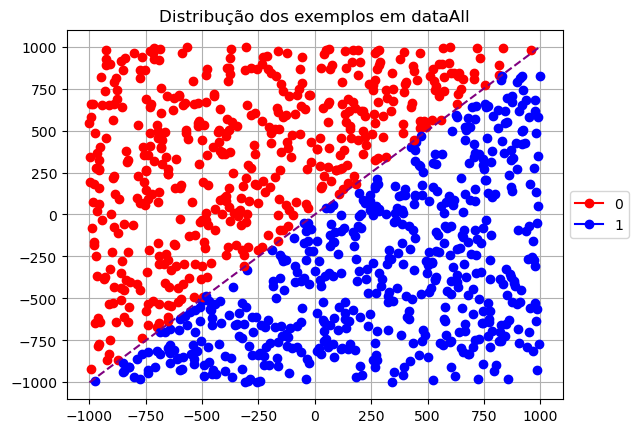

In [15]:
# Gerando o gráfico

def gen_grafico(data, final_w, title):
    x_1 = data[:,:, :1]
    x_2 = data[:,:, 1:2]
    y = data[:, :, 2:]
    fig, ax = plt.subplots()
    cor = {0: 'red', 1:'blue'}
    for i in range(data.shape[0]):
        plt.plot(x_1[i][0][0], x_2[i][0][0], marker='o', c = cor[y[i][0][0]])
        
    
    x = np.arange(-1000, 1001, 1)
    reta = (final_w[0][0]/final_w[2][0]) - (final_w[1][0]/final_w[2][0]) * x
    plt.plot(x, reta, color='purple', linestyle='--', markersize=0.5)
    ax.legend(cor, loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(True)
    ax.set_title(title)
    plt.show()

gen_grafico(dataAll, neuronio_perceptron.weights, "Distribução dos exemplos em dataAll")